# 課程目標:
    了解Keras 內建dataset 如何使用
    

# 範例重點

   使用CIFAR10 練習如何分類, 架構網路層
    
   如何對數據及進行查詢

# 導入必要的程式庫

In [1]:
import numpy
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar10.load_data()

In [3]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [4]:
# 查詢檔案維度資訊
x_img_train.shape

(50000, 32, 32, 3)

In [5]:
# 查詢檔案維度資訊
y_label_train.shape

(50000, 1)

In [6]:
# 查詢檔案維度資訊
x_img_test.shape

(10000, 32, 32, 3)

In [7]:
# 查詢檔案維度資訊
y_label_test.shape

(10000, 1)

In [8]:
#針對物件圖像數據集的類別編列成字典

label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [9]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    #得到當前的圖片
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    #num 顯現圖片數量 
    #最多25張是因為圖片排版為5,5
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        #labels裡面存放的數字對應到dict裡的類別名稱    
        title=str(i)+','+label_dict[labels[i][0]]
        
        #如果prediction裡有數字預測的話 會顯示 正確答案 => 預測類別
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

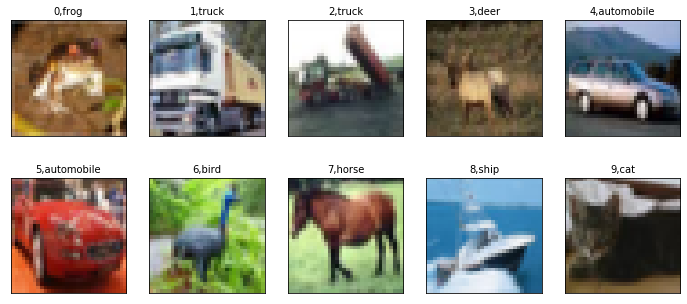

In [10]:
#針對不同的影像作標記

plot_images_labels_prediction(x_img_train,y_label_train,[],0)

In [11]:
print('x_img_test:',x_img_test.shape)
print('y_label_test :',y_label_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)


# 影像正規化

In [12]:
x_img_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [13]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [14]:
x_img_train_normalize[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

# 轉換label 為OneHot Encoding

In [15]:
y_label_train.shape

(50000, 1)

In [16]:
y_label_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [18]:
y_label_train_OneHot.shape

(50000, 10)

In [19]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# Normalization

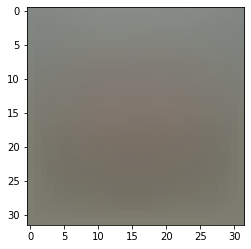

In [20]:
mean_image = np.mean(x_img_train, axis=0)
plt.imshow(mean_image.astype('uint8'))

In [21]:
X_train = x_img_train - mean_image
X_test = x_img_test - mean_image
X_train.shape

(50000, 32, 32, 3)

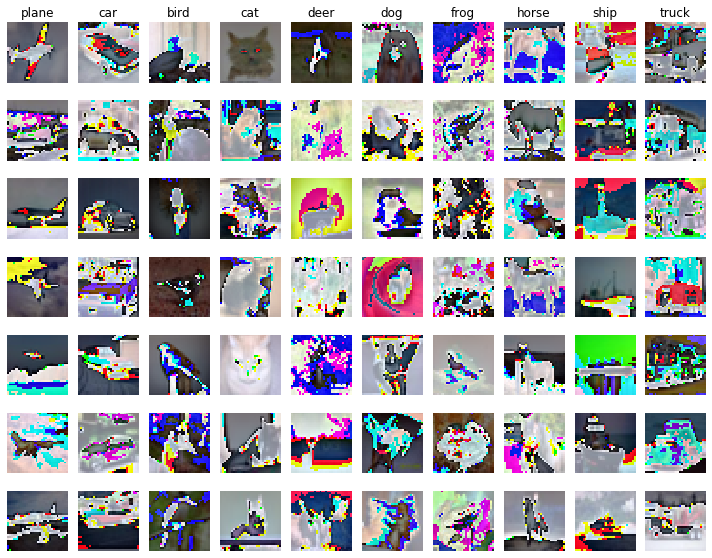

In [22]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
plt.figure(figsize=(10,8))
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    #回傳 內容數字非零的index
    idxs = np.flatnonzero(y_label_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.tight_layout()            
plt.show()

# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [23]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

# 資料準備

In [24]:
(x_img_train,y_label_train), (x_img_test, y_label_test) = cifar100.load_data()

In [25]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [26]:
# 查詢檔案維度資訊
print("Train Shape: ", x_img_train.shape)
print("Test Shape: ", x_img_test.shape)
print("Train Label Shape: ", y_label_train.shape)
print("Test Label Shape: ", y_label_test.shape)

Train Shape:  (50000, 32, 32, 3)
Test Shape:  (10000, 32, 32, 3)
Train Label Shape:  (50000, 1)
Test Label Shape:  (10000, 1)


In [27]:
#Label
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

#從資料夾meta裡面有label資訊
label = unpickle("C:/Users/tony8/.keras/datasets/cifar-100-python/meta")
#label 又分fine_label_names, coarse_label_names
label = label[b'fine_label_names']
#去除前面字串前面的b 並轉換成dict結構
label_dict = {i:label[i].decode('utf-8') for i in range(len(label))}
label_dict

{0: 'apple',
 1: 'aquarium_fish',
 2: 'baby',
 3: 'bear',
 4: 'beaver',
 5: 'bed',
 6: 'bee',
 7: 'beetle',
 8: 'bicycle',
 9: 'bottle',
 10: 'bowl',
 11: 'boy',
 12: 'bridge',
 13: 'bus',
 14: 'butterfly',
 15: 'camel',
 16: 'can',
 17: 'castle',
 18: 'caterpillar',
 19: 'cattle',
 20: 'chair',
 21: 'chimpanzee',
 22: 'clock',
 23: 'cloud',
 24: 'cockroach',
 25: 'couch',
 26: 'crab',
 27: 'crocodile',
 28: 'cup',
 29: 'dinosaur',
 30: 'dolphin',
 31: 'elephant',
 32: 'flatfish',
 33: 'forest',
 34: 'fox',
 35: 'girl',
 36: 'hamster',
 37: 'house',
 38: 'kangaroo',
 39: 'keyboard',
 40: 'lamp',
 41: 'lawn_mower',
 42: 'leopard',
 43: 'lion',
 44: 'lizard',
 45: 'lobster',
 46: 'man',
 47: 'maple_tree',
 48: 'motorcycle',
 49: 'mountain',
 50: 'mouse',
 51: 'mushroom',
 52: 'oak_tree',
 53: 'orange',
 54: 'orchid',
 55: 'otter',
 56: 'palm_tree',
 57: 'pear',
 58: 'pickup_truck',
 59: 'pine_tree',
 60: 'plain',
 61: 'plate',
 62: 'poppy',
 63: 'porcupine',
 64: 'possum',
 65: 'rabbit',

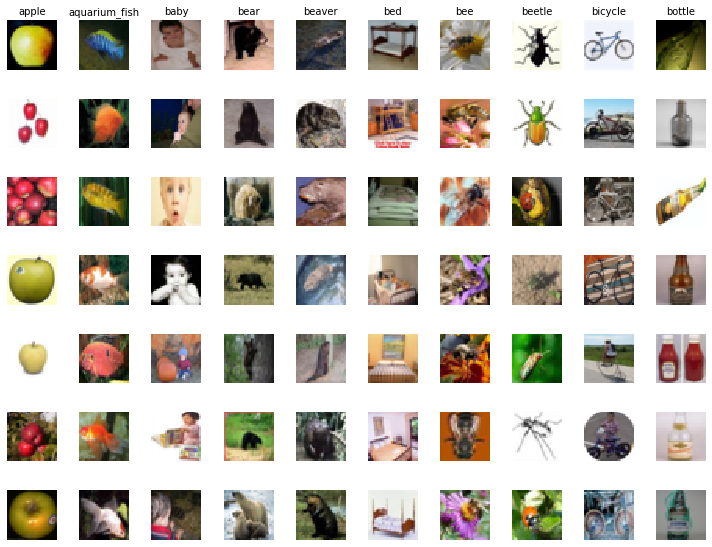

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
plt.figure(figsize=(10,8))
#classes = ['apples', 'fish', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

classes = []
for i in range(10):
    classes.append(label_dict[i])

    
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    #回傳 內容數字非零的index
    idxs = np.flatnonzero(y_label_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_img_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls, fontsize=10)

plt.tight_layout()
plt.show()

# Image normalize 

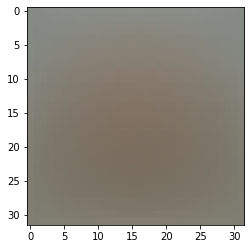

In [29]:
mean_image = np.mean(x_img_train, axis=0)
plt.imshow(mean_image.astype('uint8'))

In [30]:
X_train = x_img_train - mean_image
X_test = x_img_test - mean_image
X_train.shape

(50000, 32, 32, 3)

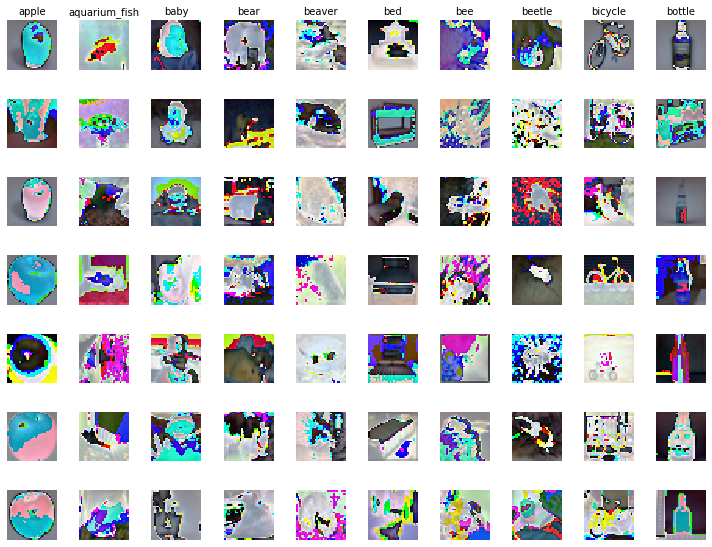

In [31]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
plt.figure(figsize=(10,8))
#classes = ['apples', 'fish', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

classes = []
for i in range(10):
    classes.append(label_dict[i])

    
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    #回傳 內容數字非零的index
    idxs = np.flatnonzero(y_label_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls, fontsize=10)
    
plt.tight_layout()    
plt.show()

# 轉換label 為OneHot Encoding

In [32]:
print("Train Label Shape: ", y_label_train.shape)
y_label_train

Train Label Shape:  (50000, 1)


array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [33]:
from keras.utils import np_utils

y_label_train = np_utils.to_categorical(y_label_train)
y_label_test = np_utils.to_categorical(y_label_test)

In [34]:
print("Train Label Shape: ", y_label_train.shape)
y_label_train

Train Label Shape:  (50000, 100)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)